In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("diwali.csv",encoding="unicode_escape")
df


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


# EDA- Exploratory data analysis


## Gender

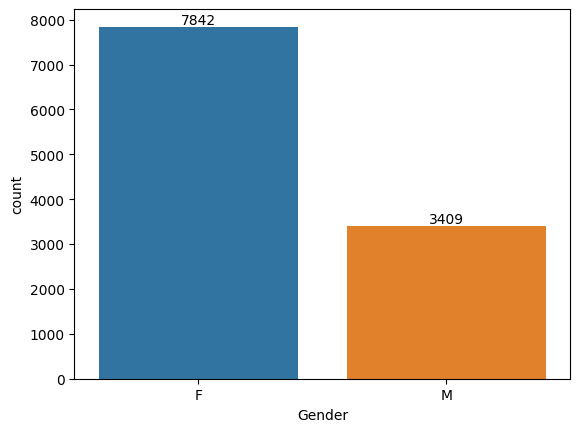

In [6]:
ax=sns.countplot(x="Gender",data=df)
ax.bar_label(ax.containers[0])

plt.show()

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [8]:
sales_gen=df.groupby(["Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_gen

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


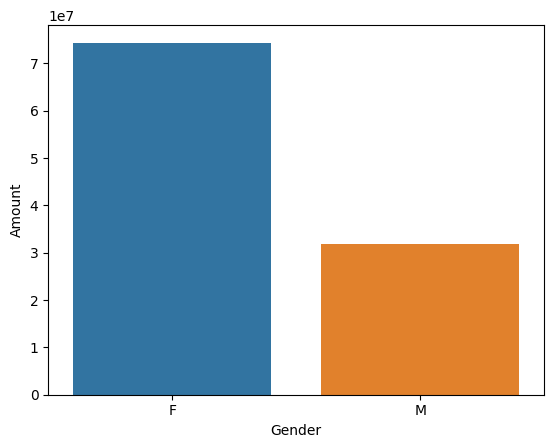

In [9]:
ax=sns.barplot(x="Gender",y="Amount",data=sales_gen)
# ax.bar_label(ax.containers[0])
plt.show()

from the above graph we can see that female have more purchasing power than male

# Age

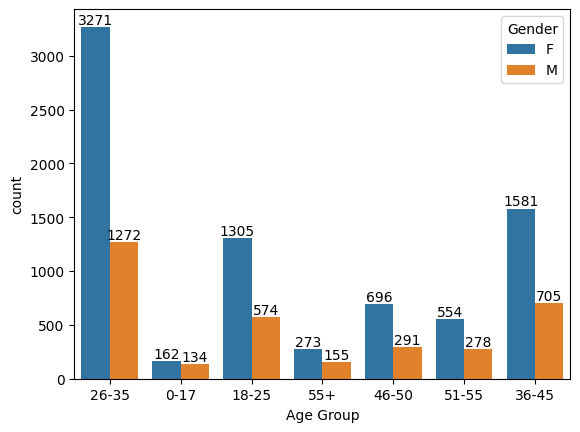

In [10]:
ax=sns.countplot(x="Age Group",data=df,hue="Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# for bars in ax.containers:
    # ax.bar_label(bars)
plt.show()

In [11]:
sales_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


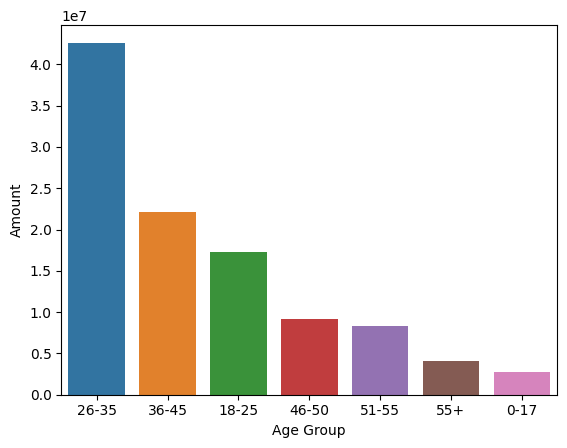

In [12]:
ax=sns.barplot(x="Age Group",y="Amount",data=sales_age)
# for bars in ax.containers:
#     ax.bar_label(bars)


from the above graph we can see that most of the buyers age between 26-35


In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

# state vs Oreders


## top 10 state acoording to orders 


In [14]:
state_orders=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
state_orders

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


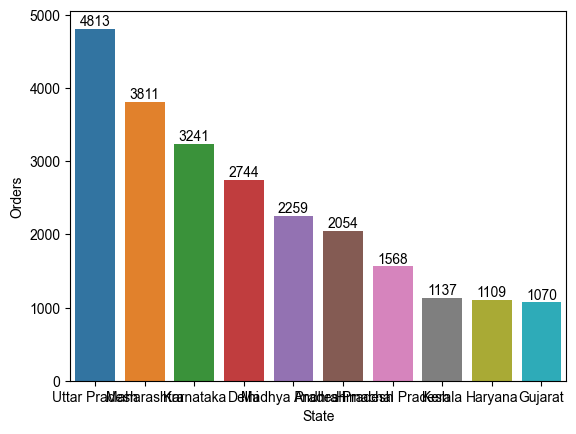

In [15]:
ax=sns.barplot(x="State",y="Orders",data=state_orders.head(10))
for bar in ax.containers:
    ax.bar_label(bar)
        

sns.set(rc={'figure.figsize':(15,5)})

## top ten state according to amount

In [16]:
state_amount=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
state_amount

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


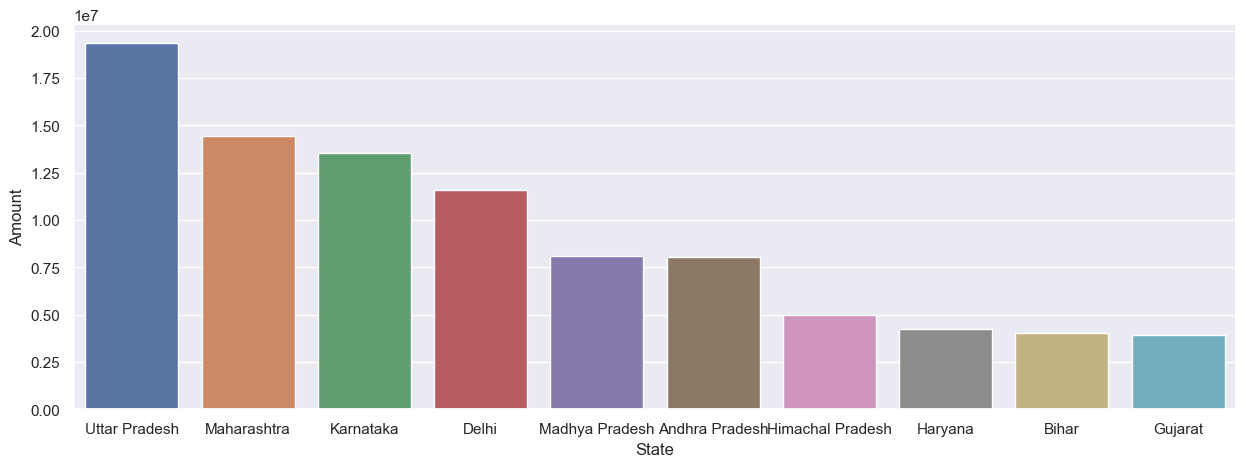

In [17]:
sns.barplot(x="State",y="Amount",data=state_amount.head(10))
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

# Martial-status

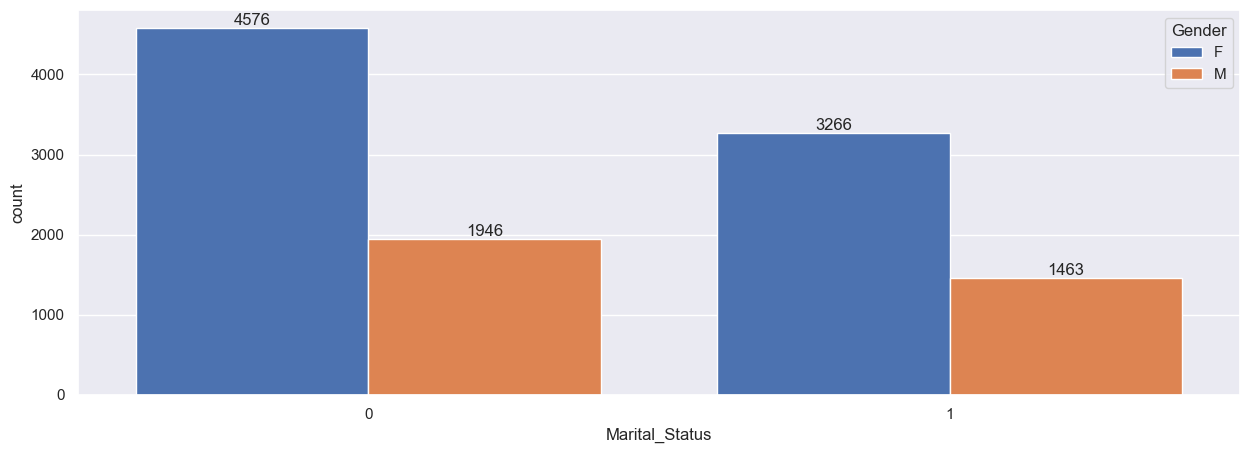

In [18]:
ax=sns.countplot(x="Marital_Status",data=df,hue="Gender",saturation=100)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(8,5)})

# Occupation

In [19]:
Occu=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
Occu

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6376405.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


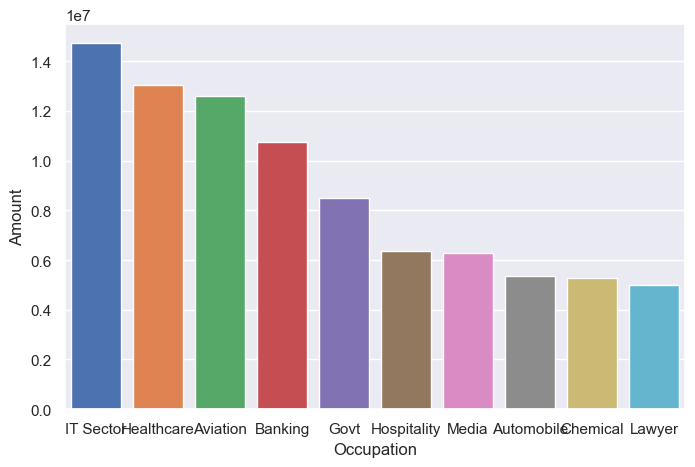

In [20]:
sns.barplot(x="Occupation",y="Amount",data=Occu.head(10),saturation=100)
sns.set(rc={'figure.figsize':(15,5)})

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

## product category 

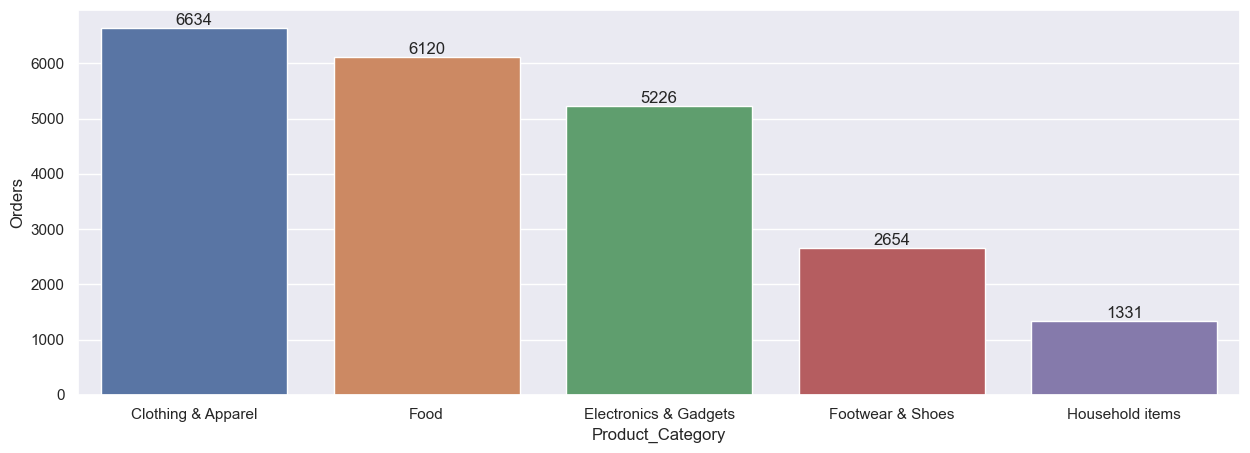

In [22]:
catg=df.groupby(["Product_Category"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
ax=sns.barplot(x="Product_Category",y="Orders",data=catg.head(5))
for bars in ax.containers:
    ax.bar_label(bars)

*from the above graph we can see that top 3  products are mostly orders*

<Axes: xlabel='Product_ID'>

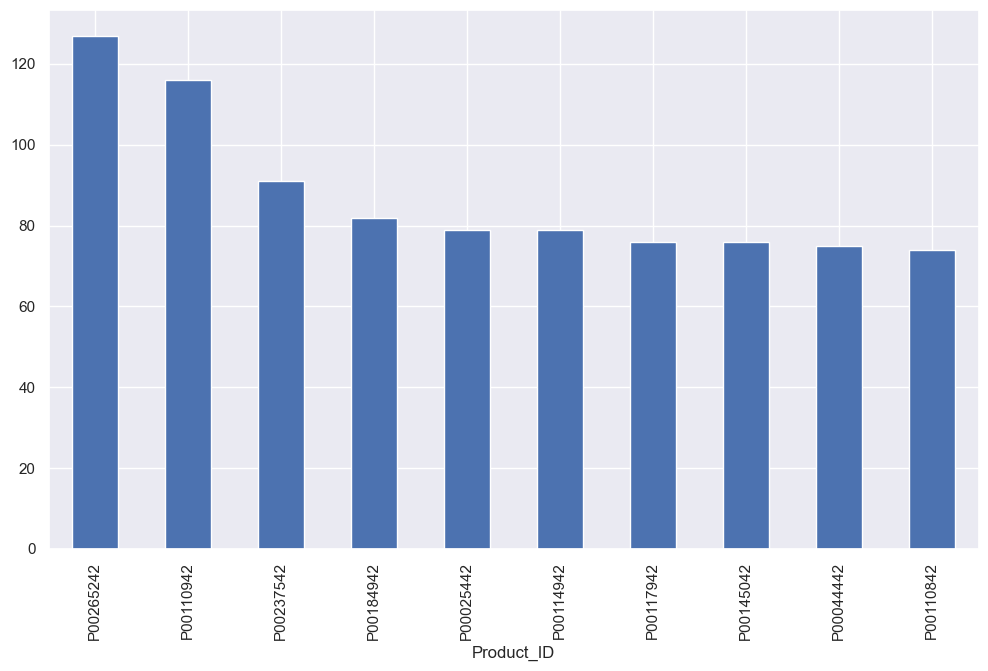

In [24]:

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion:-

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*